## Описание данных

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

Данные содержат координаты $x$ и $y$ точек некоторого изображения (обработанное фото трёх монеток с зашумлением).   
Пример данных:  

In [7]:
df = pd.read_csv('data7.csv', sep=';')

In [8]:
df.head()

,x,y
0,41,0
1,42,0
2,43,0
3,44,0
4,45,0


Размерность данных:  


In [9]:
df.shape

(322, 2)

In [11]:
from Clustering import PSKMeans, PSKMedians

In [12]:
def pskmeans_plot(data, n_clusters=3):
    km = PSKMeans(n_clusters=n_clusters, random_state=123)
    km.fit(np.array(data))
    labels_ = km.predict(np.array(data))
    plt.figure(figsize=(10, 6), dpi=100)
    c = ['red', 'green', 'blue', 'orange']
    for i in range(n_clusters):
        bit_mask = labels_ == i
        data_mask = data[bit_mask]
        plt.plot(
            data_mask['x'],
            data_mask['y'],
            'v',
            c = c[i],
            label=i,
            markersize=8,
            alpha=(0.2 * (i + 1)))
        plt.plot(km.centers[i][0], km.centers[i][1], '.', markersize=20)
        plt.xlabel('X')
        plt.ylabel('Y')

    plt.title('KMeans Clusters = {0}'.format(n_clusters))
    plt.legend()
    plt.show()

In [13]:
def pskmedians_plot(data, n_clusters=3):
    km = PSKMedians(n_clusters=n_clusters, random_state=123)
    km.fit(np.array(data))
    labels_ = km.predict(np.array(data))
    plt.figure(figsize=(10, 6), dpi=100)
    c = ['red', 'green', 'blue', 'orange']
    for i in range(n_clusters):
        bit_mask = labels_ == i
        data_mask = data[bit_mask]
        plt.plot(
            data_mask['x'],
            data_mask['y'],
            'v',
            c = c[i],
            label=i,
            markersize=8,
            alpha=(0.2 * (i + 1)))
        plt.plot(km.centers[i][0], km.centers[i][1], '.', markersize=20)
        plt.xlabel('X')
        plt.ylabel('Y')

    plt.title('KMedians Clusters = {0}'.format(n_clusters))
    plt.legend()
    
    plt.show()

### Применение методов с разным количеством кластеров и их отображение на графиках

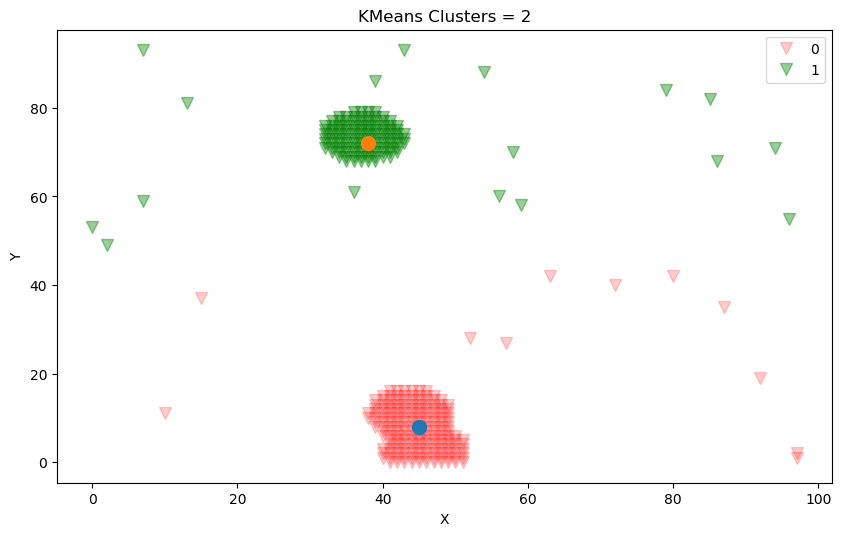

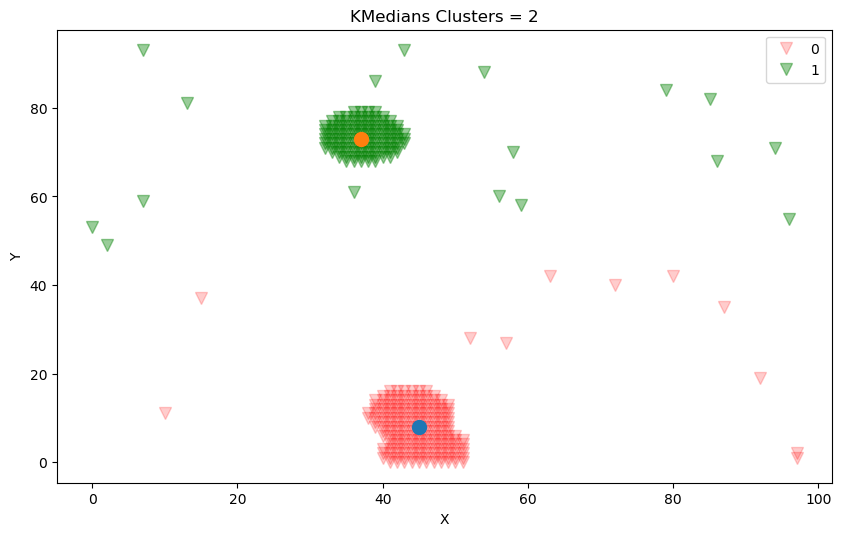

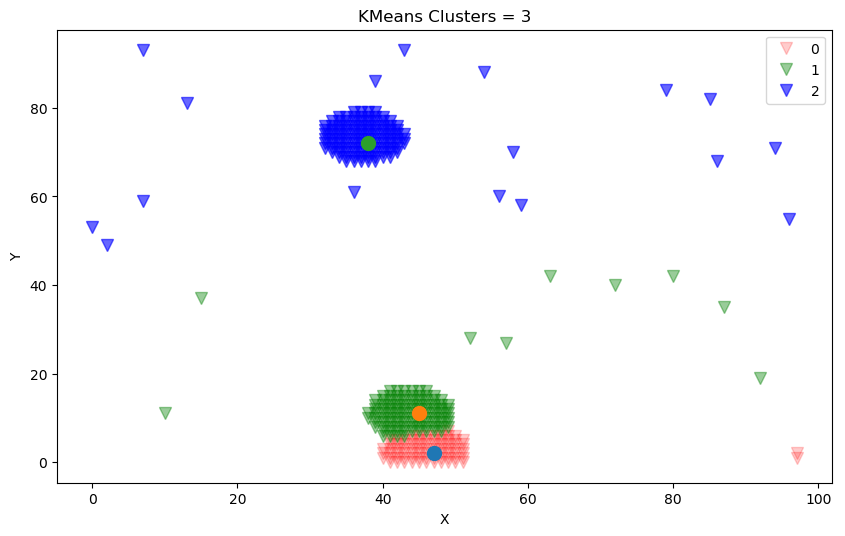

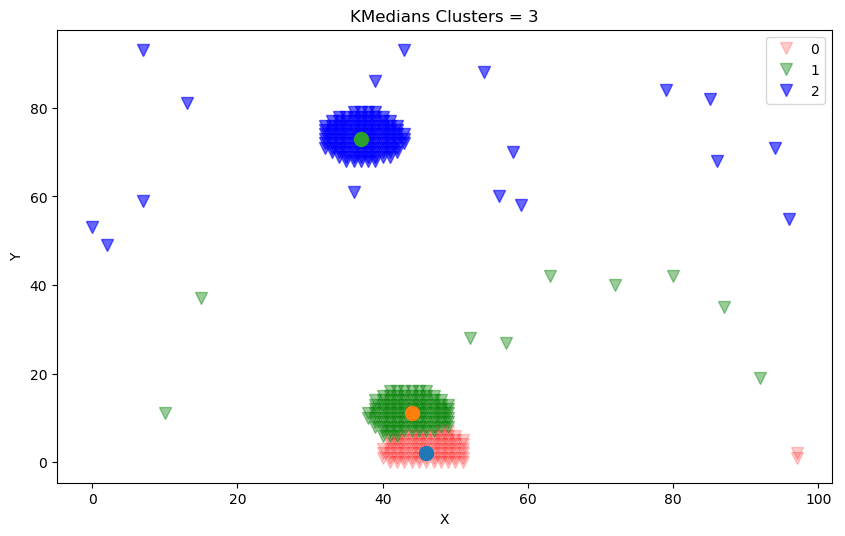

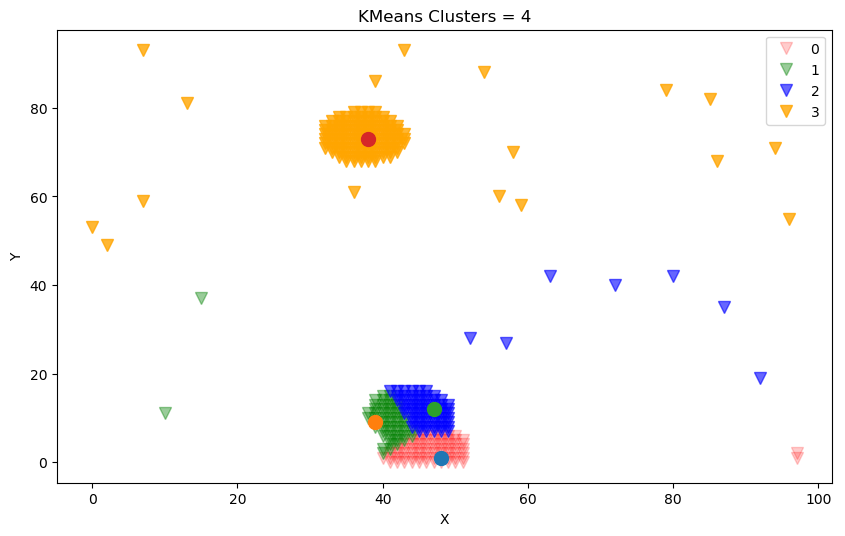

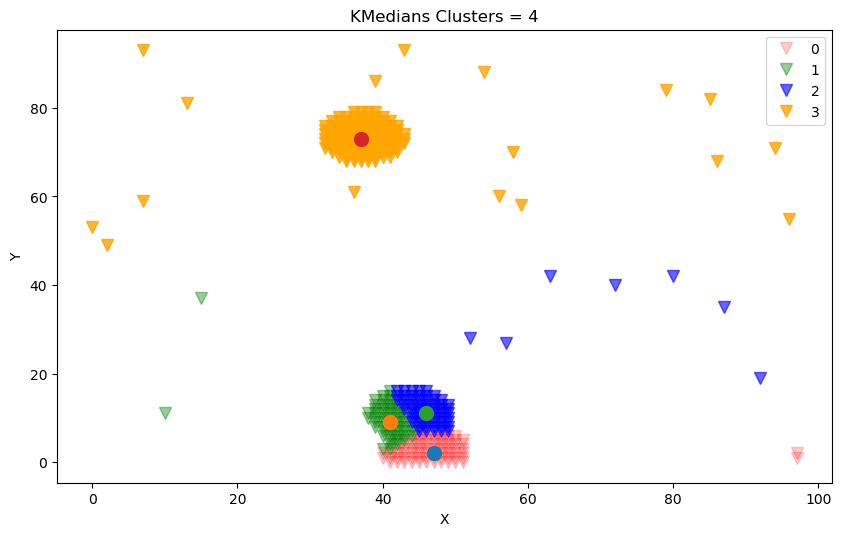

In [14]:
for i in range(2, 5):
    pskmeans_plot(df, n_clusters=i)
    pskmedians_plot(df, n_clusters=i)